#Downloading data from kaggel

In [1]:
import kagglehub
import shutil
import os

# Download the dataset
path = kagglehub.dataset_download("neurocipher/student-performance")

print("Original download path:", path)

# Define the destination in /content
dest_path = "/content/student-performance"

# If the destination already exists, remove it first
if os.path.exists(dest_path):
    shutil.rmtree(dest_path)

# Copy the entire dataset to /content as the source is read-only
shutil.copytree(path, dest_path)

print(f"Dataset copied to: {dest_path}")

# List the files in the new location
print("\nFiles in /content/student-performance:")
for file in os.listdir(dest_path):
    print(f"  - {file}")

100%|██████████| 48.5k/48.5k [00:00<00:00, 1.45MB/s]

Extracting files...
Original download path: /root/.cache/kagglehub/datasets/neurocipher/student-performance/versions/1
Dataset copied to: /content/student-performance

Files in /content/student-performance:
  - StudentPerformance.csv


#Load Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Load Dataset

In [3]:
# Replace with your actual file path
df = pd.read_csv("/content/student-performance/StudentPerformance.csv")

# Quick overview
print(df.head())
print(df.info())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

#Data Visualization (Scatter Plots)

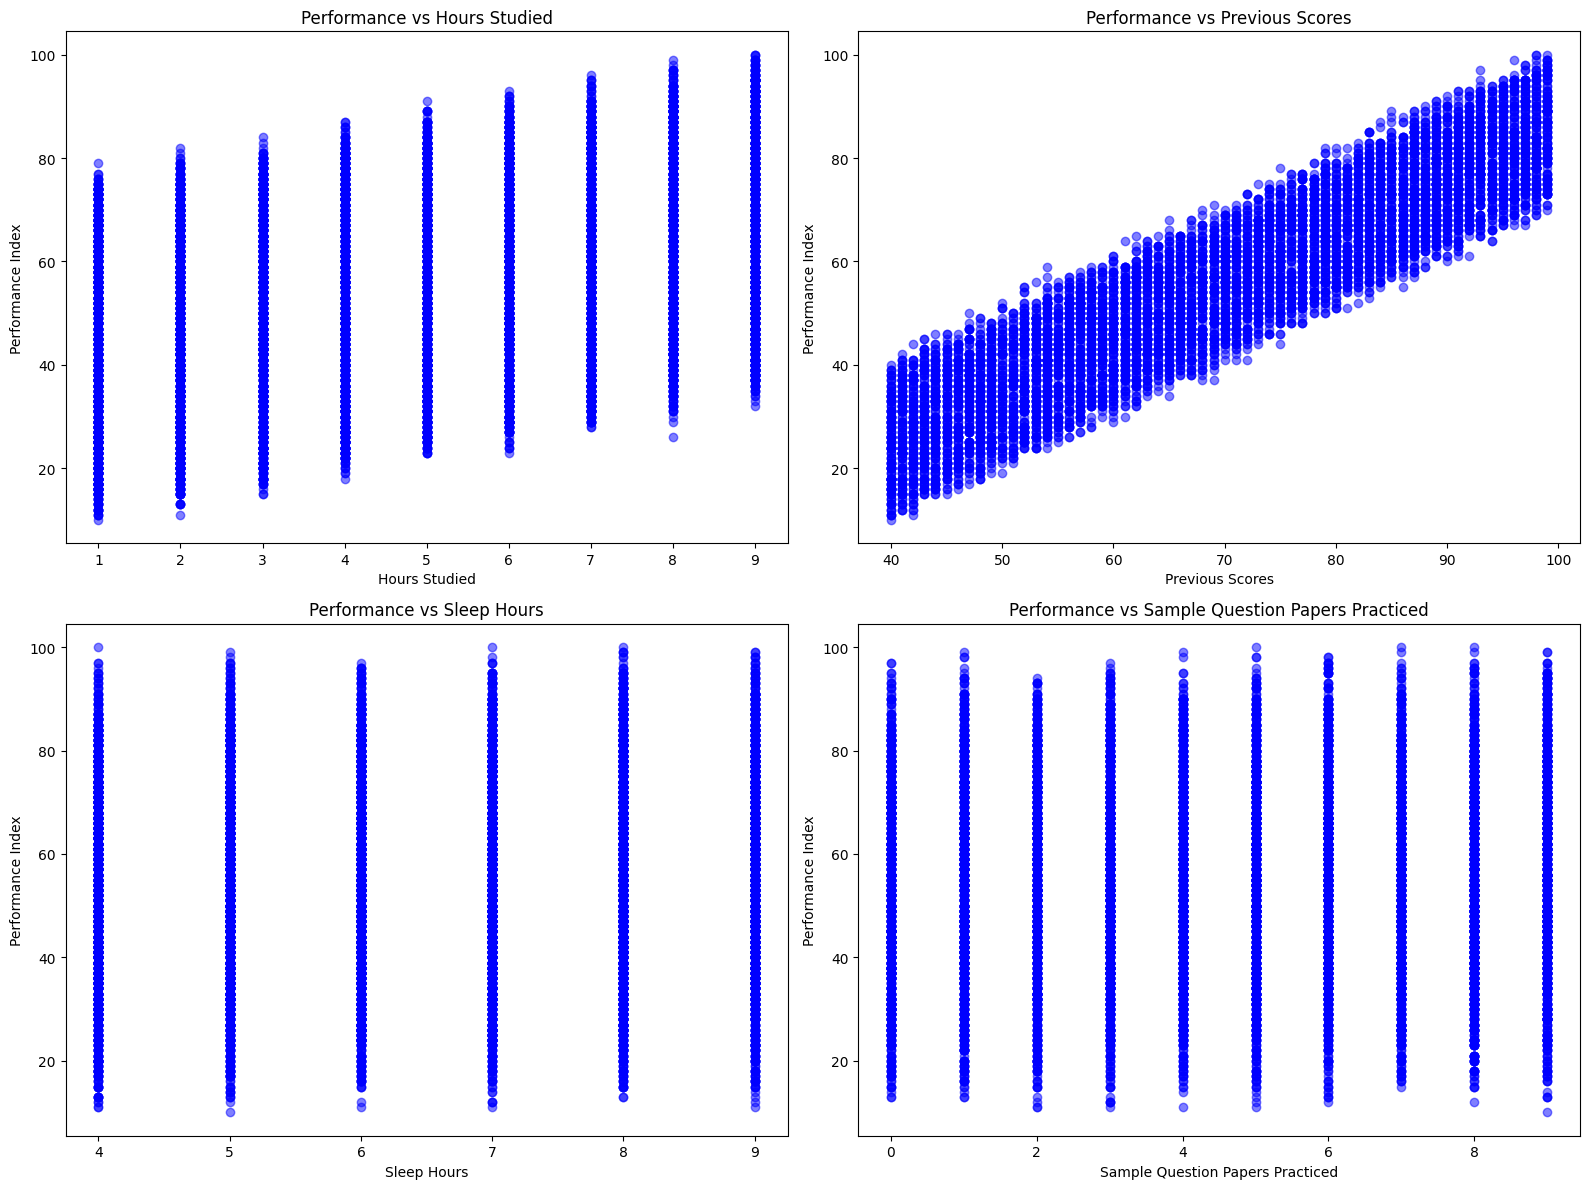

In [4]:
numeric_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

plt.figure(figsize=(16,12))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[feature], df["Performance Index"], alpha=0.5, color='blue')
    plt.xlabel(feature)
    plt.ylabel("Performance Index")
    plt.title(f"Performance vs {feature}")
plt.tight_layout()
plt.show()


#Check for Missing Values

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


#Define Features and Target

In [6]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

categorical_features = ["Extracurricular Activities"]
numerical_features = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced"
]


#One-Hot Encoding for Categorical Variable

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)


#Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Linear Regression Model

In [9]:
linear_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("R2:", r2_score(y_test, y_pred_linear))


Linear Regression Results
MAE: 1.6111213463123055
RMSE: 2.020551508505007
R2: 0.9889832909573145


#Polynomial Regression Model(degree 2)

In [15]:
poly_model2 = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

poly_model2.fit(X_train, y_train)

y_pred_poly = poly_model2.predict(X_test)

print("Polynomial Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression Results
MAE: 1.6119315630026123
RMSE: 2.022906628001369
R2: 0.988957594223477


#Polynomial Regression Model (degree 3)

In [14]:
poly_model3 = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("model", LinearRegression())
])

poly_model3.fit(X_train, y_train)

y_pred_poly = poly_model3.predict(X_test)

print("Polynomial Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression Results
MAE: 1.6119315630026123
RMSE: 2.022906628001369
R2: 0.988957594223477


#Application : Predict New Student Score

In [17]:
def predict_score(hours_studied, previous_scores, sleep_hours, papers_practiced, extracurricular):


    new_data = pd.DataFrame({
        "Hours Studied": [hours_studied],
        "Previous Scores": [previous_scores],
        "Sleep Hours": [sleep_hours],
        "Sample Question Papers Practiced": [papers_practiced],
        "Extracurricular Activities": [extracurricular]
    })

    predicted_score = linear_model.predict(new_data)[0]
    return predicted_score

# Ask user for input
hours_studied = int(input("Enter Hours Studied: "))
previous_scores = int(input("Enter Previous Scores: "))
sleep_hours = int(input("Enter Sleep Hours: "))
papers_practiced = int(input("Enter Sample Question Papers Practiced: "))
extracurricular = input("Enter Extracurricular Activities (Yes/No): ")
extracurricular = extracurricular.strip().capitalize()

# Predict using the trained model
predicted_score = predict_score(
    hours_studied,
    previous_scores,
    sleep_hours,
    papers_practiced,
    extracurricular
)

print(f"\nPredicted Performance Index: {predicted_score:.1f}")

Enter Hours Studied: 2
Enter Previous Scores: 60
Enter Sleep Hours: 8
Enter Sample Question Papers Practiced: 3
Enter Extracurricular Activities (Yes/No): yes

Predicted Performance Index: 37.8


#Download the model to use it in other application

In [16]:
import joblib

joblib.dump(linear_model, "model.pkl")


['model.pkl']